## Proyecto GYA

### Extracción de datos

In [1]:
## Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import psycopg2

In [2]:
## Extraer datos de archivos
data_1 = pd.read_excel("C:\\uao_bigdata\\Gestion\\EMIC_FronterasComerciales_02-08-2024.xlsx")
data_2 = pd.read_excel('C:\\uao_bigdata\\Gestion\\Formato reporte SDL EMCALI fronteras MNR 2024 (1).xlsm')

In [3]:
## Cobnvertir en dataframe y combinar en uno solo
df1 = pd.DataFrame(data_1)
df2 = pd.DataFrame(data_2)
df1['CODIGO SIC'] = df1['CODIGO SIC'].str.upper()
df_clientes = pd.merge(df1,df2, on='CODIGO SIC', how='inner')

### Transformación de datos

In [4]:
## Eliminación de columnas no requeridas\\Depuración de los datos
lista_columnas = ['Factor de Pérdidas','NIU','NIT','Representante Anterior','Operador de Red de la Zona','Agente Exportador','Agente Importador',
                  'Nombre del CGM','Código SIC DDV','Predio ID','Nombre del Predio','Representante de la DDV','Clase del Medidor','Clase del CT',
                  'Clase del PT','Entidad Calibradora Med. Ppal.','Actualizada por última vez el','Entidad Calibradora Med. Resp.','Actualizada por última vez el',
                  'Es Agrupadora','Factor PSF (Para agrupadoras)','Agrupada bajo la','Es Principal de Modelo Embebido','Embebida bajo la','Factor Acordado','Factor Ajuste',
                  'Factor de Pérdidas Frontera Principal (para embebidas)','Código CIIU','Clasificación Industrial Específica','NIT','Centro Poblado','Latitud (°)','Longitud (°)',
                  'Altitud (msnm)','Código SIC Submercado','kvarh_H1','kvarh_H2','kvarh_H3','kvarh_H4','kvarh_H5','kvarh_H6','kvarh_H7','kvarh_H8','kvarh_H9','kvarh_H10','kvarh_H11','kvarh_H12',
                  'kvarh_H13','kvarh_H14','kvarh_H15','kvarh_H16','kvarh_H17','kvarh_H18','kvarh_H19','kvarh_H20','kvarh_H21','kvarh_H22','kvarh_H23','kvarh_H24','Exceso de kvarh_H1','Exceso de kvarh_H2',
                  'Exceso de kvarh_H3','Exceso de kvarh_H4','Exceso de kvarh_H5','Exceso de kvarh_H6','Exceso de kvarh_H7','Exceso de kvarh_H8','Exceso de kvarh_H9','Exceso de kvarh_H10',
                  'Exceso de kvarh_H11','Exceso de kvarh_H12','Exceso de kvarh_H13','Exceso de kvarh_H14','Exceso de kvarh_H15','Exceso de kvarh_H16','Exceso de kvarh_H17','Exceso de kvarh_H18',
                  'Exceso de kvarh_H19','Exceso de kvarh_H20','Exceso de kvarh_H21','Exceso de kvarh_H22','Exceso de kvarh_H23','Exceso de kvarh_H24','kvarh_dia','Exceso de kvarh_dia','NIT.1',
                  'Actualizada por última vez el.1','Fecha de Calibración Med. Resp.','Fecha de Calibración Med. Ppal','Número de Serie Med. Resp.','Marca Med. Resp.','Último Cambio en Medidor Resp.',
                  'Número de Serie Med. Ppal','Marca Med. Ppal']

df_clientes.drop(lista_columnas, axis=1, inplace=True)
df_clientes['Nombre de la Frontera'] = df_clientes['Nombre de la Frontera'].str.upper()
df_clientes['Registrada por primera vez el'] = pd.to_datetime(df_clientes['Registrada por primera vez el'],dayfirst=True)
df_clientes['Inicio Representación Frontera'] = pd.to_datetime(df_clientes['Inicio Representación Frontera'],dayfirst=True)
df_clientes['Último Cambio en Medidor Ppal o Transformadores'] = pd.to_datetime(df_clientes['Último Cambio en Medidor Ppal o Transformadores'],dayfirst=True)
df_clientes.rename(columns={'FECHA':'Fecha'},inplace=True)
df_clientes['Dia'] = df_clientes['Fecha'].dt.day
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37347 entries, 0 to 37346
Data columns (total 43 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   CODIGO SIC                                       37347 non-null  object        
 1   Nombre de la Frontera                            37347 non-null  object        
 2   Registrada en el Mercado por                     37347 non-null  object        
 3   Registrada por primera vez el                    37347 non-null  datetime64[ns]
 4   Voltaje (kV)                                     37347 non-null  float64       
 5   Nivel de Tensión                                 37347 non-null  int64         
 6   Tipo Punto Medicion                              37347 non-null  float64       
 7   Representante Frontera                           37347 non-null  object        
 8   Inicio Representación Frontera      

### Visualización de datos

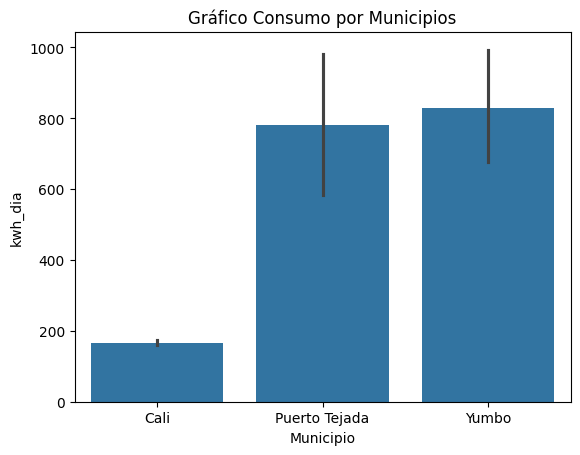

In [6]:
sns.barplot(x='Municipio', y='kwh_dia', data=df_clientes)
plt.title('Gráfico Consumo por Municipios')
plt.show()

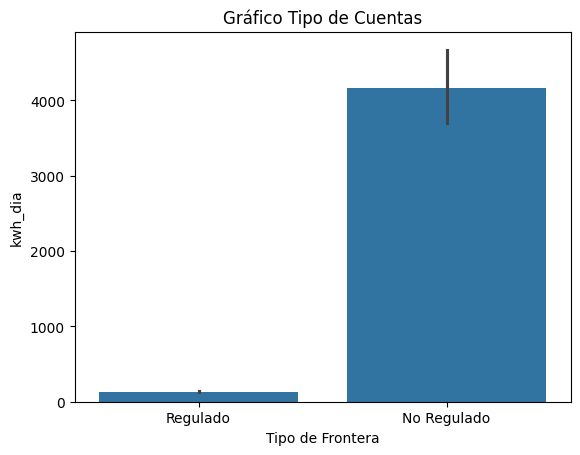

In [7]:
sns.barplot(x='Tipo de Frontera', y='kwh_dia', data=df_clientes)
plt.title('Gráfico Tipo de Cuentas')
plt.show()

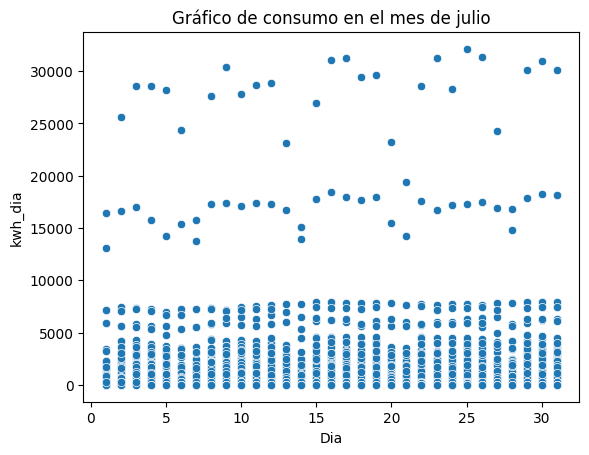

In [10]:
sns.scatterplot(x='Dia', y='kwh_dia', data=df_clientes)
plt.title('Gráfico de consumo en el mes de julio')
plt.show()

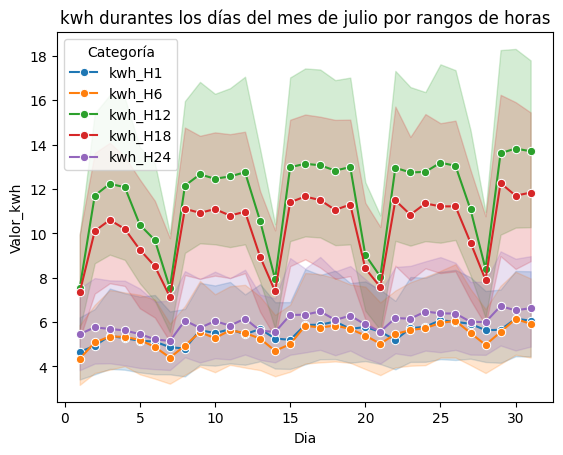

In [11]:
# Convertir el DataFrame a formato largo
df_long = pd.melt(df_clientes, id_vars=['Dia'], value_vars=['kwh_H1', 'kwh_H6', 'kwh_H12', 'kwh_H18','kwh_H24'], 
                  var_name='Categoría', value_name='Valor_kwh')

# Graficar con Seaborn
sns.lineplot(data=df_long, x='Dia', y='Valor_kwh', hue='Categoría', marker='o')

# Título
plt.title('kwh durantes los días del mes de julio por rangos de horas')
plt.show()

### Cargue en base de datos postgres

In [12]:
# Configuración de la conexión
conn = psycopg2.connect(
    host="localhost",  
    port="5432",       # Puerto mapeado
    database="bd",  # Base de datos por defecto
    user="arq",   # Usuario por defecto
    password="password"  # Contraseña que configuraste en el contenedor
)

# Crear un cursor para ejecutar consultas
cur = conn.cursor()

# Ejecutar una consulta
cur.execute("SELECT version();")

# Obtener los resultados
db_version = cur.fetchone()
print(f"Versión de PostgreSQL: {db_version}")

Versión de PostgreSQL: ('PostgreSQL 9.6.24 on x86_64-pc-linux-gnu (Debian 9.6.24-1.pgdg90+1), compiled by gcc (Debian 6.3.0-18+deb9u1) 6.3.0 20170516, 64-bit',)


In [13]:
sql_table = '''CREATE TABLE IF NOT EXISTS MEDIDAS(
  codigo_sic VARCHAR(255),
  nombre_frontera VARCHAR(255),
  registrada_mercado_por VARCHAR(255),
  registrada_primera_vez_el TIMESTAMP,
  voltaje_kv FLOAT,
  nivel_tension INT,
  tipo_punto_medicion FLOAT,
  representante_frontera VARCHAR(255),
  inicio_representacion_frontera TIMESTAMP,
  operador_red VARCHAR(255),
  tipo_frontera VARCHAR(255),
  ultimo_cambio_medidor_ppal TIMESTAMP,
  clasificacion_industrial_general VARCHAR(255),
  departamento VARCHAR(255),
  municipio VARCHAR(255),
  direccion VARCHAR(255),
  fecha TIMESTAMP,
  kwh_h1 FLOAT,
  kwh_h2 FLOAT,
  kwh_h3 FLOAT,
  kwh_h4 FLOAT,
  kwh_h5 FLOAT,
  kwh_h6 FLOAT,
  kwh_h7 FLOAT,
  kwh_h8 FLOAT,
  kwh_h9 FLOAT,
  kwh_h10 FLOAT,
  kwh_h11 FLOAT,
  kwh_h12 FLOAT,
  kwh_h13 FLOAT,
  kwh_h14 FLOAT,
  kwh_h15 FLOAT,
  kwh_h16 FLOAT,
  kwh_h17 FLOAT,
  kwh_h18 FLOAT,
  kwh_h19 FLOAT,
  kwh_h20 FLOAT,
  kwh_h21 FLOAT,
  kwh_h22 FLOAT,
  kwh_h23 FLOAT,
  kwh_h24 FLOAT,
  kwh_dia FLOAT,
  dia INT
)'''

cur.execute(sql_table)

In [14]:
sql_insert = '''INSERT into MEDIDAS(
codigo_sic,
nombre_frontera,
registrada_mercado_por,
registrada_primera_vez_el,
voltaje_kv,
nivel_tension,
tipo_punto_medicion,
representante_frontera,
inicio_representacion_frontera,
operador_red,
tipo_frontera,
ultimo_cambio_medidor_ppal,
clasificacion_industrial_general,
departamento,
municipio,
direccion,
fecha,
kwh_h1,
kwh_h2,
kwh_h3,
kwh_h4,
kwh_h5,
kwh_h6,
kwh_h7,
kwh_h8,
kwh_h9,
kwh_h10,
kwh_h11,
kwh_h12,
kwh_h13,
kwh_h14,
kwh_h15,
kwh_h16,
kwh_h17,
kwh_h18,
kwh_h19,
kwh_h20,
kwh_h21,
kwh_h22,
kwh_h23,
kwh_h24,
kwh_dia,
dia) values(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 
  %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, 
  %s, %s, %s, %s, %s, %s, %s, %s, %s)'''

#convertir de dataframe a tuplas

datos_tuplas = [tuple(contador) for contador in df_clientes.to_numpy()]

cur.executemany(sql_insert,datos_tuplas)
conn.commit()
